# Exploratory Data Analysis Notebook

### Imports

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [12]:
# Reading dataset
df_fake = pd.read_csv('data/Fake.csv')
df_true = pd.read_csv('data/True.csv')

# Add a label col
df_fake['label'] = 0 #False
df_true['label'] = 1 #Real

# merge both datasets
df = pd.concat([df_fake,df_true]).reset_index(drop=True) #resting index to avoid duplicate index num when merging

print(df.head())
print(df['label'].value_counts())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  label  
0  December 31, 2017      0  
1  December 31, 2017      0  
2  December 30, 2017      0  
3  December 29, 2017      0  
4  December 25, 2017      0  
label
0    23481
1    21417
Name: count, dtype: int64


### Visualization of merged data

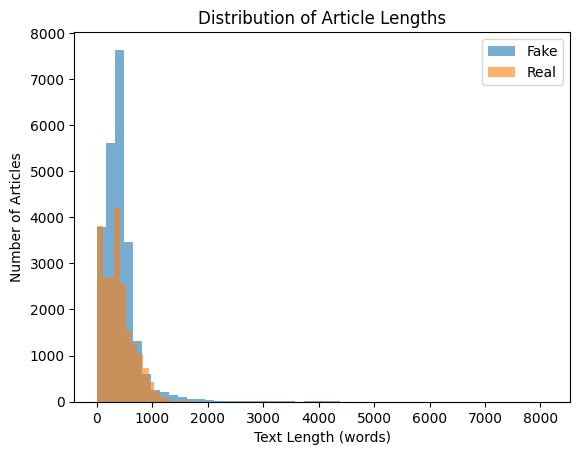

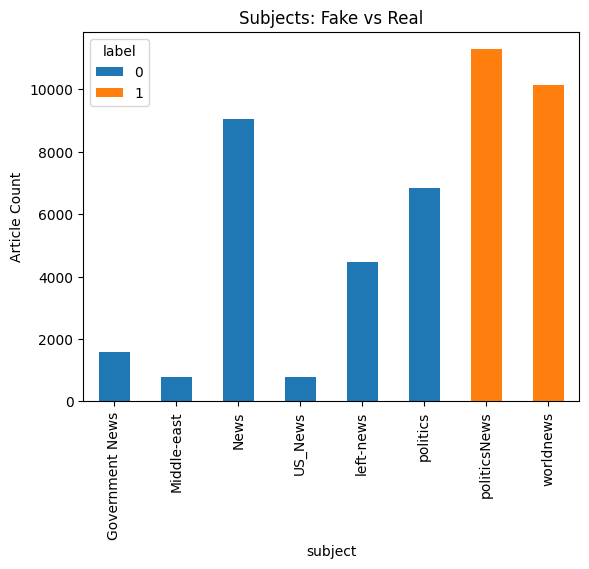

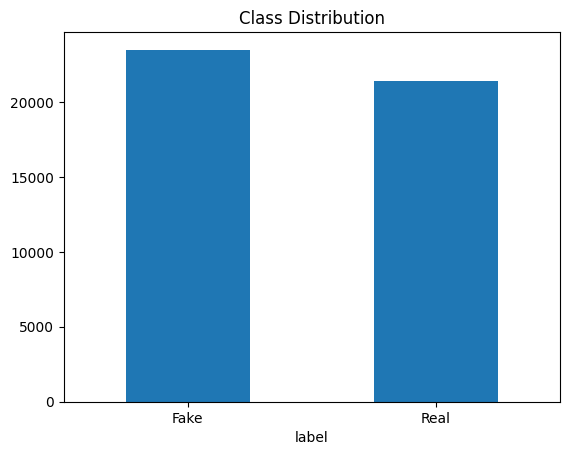

In [19]:
#Visualizing Amount of Articles VS Text Length

df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

plt.hist(df[df['label'] == 0]['text_length'], bins=50, alpha=0.6, label='Fake')
plt.hist(df[df['label'] == 1]['text_length'], bins=50, alpha=0.6, label='Real')
plt.xlabel('Text Length (words)')
plt.ylabel('Number of Articles')
plt.legend()
plt.title('Distribution of Article Lengths')
plt.show()


#Subject vs Label to see if certain topics more prone to fake news
df.groupby(['subject', 'label']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Subjects: Fake vs Real')
plt.ylabel('Article Count')
plt.show()

#Balance Chart
df['label'].value_counts().plot(kind='bar')
plt.xticks(ticks=[0, 1], labels=['Fake', 'Real'], rotation=0)
plt.title("Class Distribution")

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year